<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Microsoft-is-Joining-the-Streaming-Race" data-toc-modified-id="Microsoft-is-Joining-the-Streaming-Race-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Microsoft is Joining the Streaming Race</a></span></li><li><span><a href="#Method" data-toc-modified-id="Method-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Method</a></span></li><li><span><a href="#Cleaning-Data" data-toc-modified-id="Cleaning-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning Data</a></span></li><li><span><a href="#Finding-Recommended-Budget" data-toc-modified-id="Finding-Recommended-Budget-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Finding Recommended Budget</a></span><ul class="toc-item"><li><span><a href="#Top-10%-Budgets" data-toc-modified-id="Top-10%-Budgets-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Top 10% Budgets</a></span></li><li><span><a href="#All-Budgets" data-toc-modified-id="All-Budgets-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>All Budgets</a></span></li><li><span><a href="#Top-10%-Analysis" data-toc-modified-id="Top-10%-Analysis-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Top 10% Analysis</a></span></li></ul></li><li><span><a href="#Finding-Recommended-Release-Month" data-toc-modified-id="Finding-Recommended-Release-Month-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finding Recommended Release Month</a></span><ul class="toc-item"><li><span><a href="#Top-10%-Release-Month" data-toc-modified-id="Top-10%-Release-Month-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Top 10% Release Month</a></span></li><li><span><a href="#All-Release-Month" data-toc-modified-id="All-Release-Month-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>All Release Month</a></span></li><li><span><a href="#Comparison-of-Release-Months" data-toc-modified-id="Comparison-of-Release-Months-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Comparison of Release Months</a></span></li></ul></li><li><span><a href="#Finding-Recommended-Genre" data-toc-modified-id="Finding-Recommended-Genre-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Finding Recommended Genre</a></span><ul class="toc-item"><li><span><a href="#Top-10%-Genre-Rep" data-toc-modified-id="Top-10%-Genre-Rep-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Top 10% Genre Rep</a></span></li><li><span><a href="#All-Genre-Rep" data-toc-modified-id="All-Genre-Rep-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>All Genre Rep</a></span></li><li><span><a href="#Comparison-of-all-genres" data-toc-modified-id="Comparison-of-all-genres-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Comparison of all genres</a></span></li></ul></li><li><span><a href="#Final-Conclusions" data-toc-modified-id="Final-Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final Conclusions</a></span></li></ul></div>

## Microsoft is Joining the Streaming Race

Author: Katie Whitson

Overview:
Microsoft feels left out of the streaming services. They want to join Apple, Netflix, and Amazon in the original content battle. I will be showing how much money should be budgeted, when the movie should be released, and what type of movie should be produced. This will be determined from the data on Box Office Mojo, IMDB, TheMovieDB, and The Numbers. After the analysis, the head of Microsoft's movie studio should be able to better determine what to start with.

## Method
I am determining the PIR, profit investment return, of all movies we have
data on. I will use the top 10% to answer the following questions. Then, 
compare to the whole to see if any value is represented more in the top
than the whole.

* What should the budget be?
* When should the release date be?
* What genre should the movie be?

## Cleaning Data

In [1]:
# standard imports
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# see what table looks like
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
print(df_budgets.shape)
df_budgets.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# Get rid of symbols or capitalizations that could hinder matching with
# other tables. Clear out number symbols so that numbers can be integers.
def clean_title(df, column):
    data = df
    data[column] = data[column].str.replace('.', '')
    data[column] = data[column].str.replace(',', '')
    data[column] = data[column].str.replace(':', '')
    data[column] = data[column].str.replace('$', '')
    data[column] = data[column].str.replace('â', '')
    data[column] = data[column].str.lower()

In [5]:
#removing punctuation and capitalization to better match others
clean_title(df_budgets, 'movie')
clean_title(df_budgets, 'production_budget')
clean_title(df_budgets, 'domestic_gross')
clean_title(df_budgets, 'worldwide_gross')
df_budgets.head()

<ipython-input-4-9006c6fcf56e>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data[column] = data[column].str.replace('.', '')
<ipython-input-4-9006c6fcf56e>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data[column] = data[column].str.replace('$', '')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",avengers age of ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",star wars ep viii the last jedi,317000000,620181382,1316721747


In [6]:
# converting money to be integers for future calculations
convert_dict = {'production_budget': int,
                'domestic_gross': int,
                'worldwide_gross': int} 
df_budgets = df_budgets.astype(convert_dict)  
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [7]:
#creating domestic PIR
df_budgets['domestic_pir'] = df_budgets['domestic_gross']/df_budgets['production_budget']

In [8]:
#creating worldwide PIR
df_budgets['worldwide_pir'] = df_budgets['worldwide_gross']/df_budgets['production_budget']

In [9]:
#fixing dates to be organized by year-month-date in numbers
df_budgets['release_date'] = pd.to_datetime(df_budgets['release_date'])
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_pir,worldwide_pir
0,1,2009-12-18,avatar,425000000,760507625,2776345279,1.789430,6.532577
1,2,2011-05-20,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,0.587101,2.546673
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350,0.122178,0.427892
3,4,2015-05-01,avengers age of ultron,330600000,459005868,1403013963,1.388403,4.243841
4,5,2017-12-15,star wars ep viii the last jedi,317000000,620181382,1316721747,1.956408,4.153696


In [10]:
#create new modified table from transformed data
df_budgets.to_csv('zippedData/tn.movie_budgets_pir.csv')

In [11]:
#clean basic's table 
df_basics = pd.read_csv('zippedData/imdb.title.basics.csv')

print(df_basics.shape)
df_basics.head()

(146144, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
#removing punctuation and capitalization to better match others
clean_title(df_basics, 'primary_title')
clean_title(df_basics, 'original_title')

<ipython-input-4-9006c6fcf56e>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data[column] = data[column].str.replace('.', '')
<ipython-input-4-9006c6fcf56e>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data[column] = data[column].str.replace('$', '')


In [13]:
# split genres until all are in their own
new_basics = df_basics['genres'].str.split(",", n = 1, expand = True)
df_basics['genre_1']= new_basics[0]
df_basics['genre_2']= new_basics[1]
df_basics.drop(columns =['genres'], inplace = True)
df_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genre_1,genre_2
0,tt0063540,sunghursh,sunghursh,2013,175.0,Action,"Crime,Drama"
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,Biography,Drama
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,Drama,None
3,tt0069204,sabse bada sukh,sabse bada sukh,2018,NaN,Comedy,Drama
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,Comedy,"Drama,Fantasy"


In [14]:
new_basics = df_basics['genre_2'].str.split(",", n = 1, expand = True)
df_basics['genre_2']= new_basics[0]
df_basics['genre_3']= new_basics[1]
df_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genre_1,genre_2,genre_3
0,tt0063540,sunghursh,sunghursh,2013,175.0,Action,Crime,Drama
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,Biography,Drama,None
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,Drama,None,None
3,tt0069204,sabse bada sukh,sabse bada sukh,2018,NaN,Comedy,Drama,None
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,Comedy,Drama,Fantasy


In [15]:
# shows no more "doubled" genres columns
print(df_basics['genre_3'].unique())
print(df_basics['genre_2'].unique())
print(df_basics['genre_1'].unique())

['Drama' None 'Fantasy' 'Comedy' 'History' nan 'Sci-Fi' 'Thriller'
 'Romance' 'War' 'Crime' 'Family' 'Music' 'Horror' 'Animation' 'Sport'
 'Western' 'Mystery' 'Documentary' 'Musical' 'Biography' 'News'
 'Reality-TV' 'Short']
['Crime' 'Drama' None 'Thriller' 'Animation' 'History' nan 'Mystery'
 'Comedy' 'Adventure' 'Romance' 'Horror' 'Family' 'Sci-Fi' 'Fantasy'
 'Sport' 'Documentary' 'Music' 'War' 'Biography' 'Musical' 'Western'
 'News' 'Reality-TV' 'Talk-Show' 'Game-Show' 'Adult' 'Short']
['Action' 'Biography' 'Drama' 'Comedy' 'Horror' 'Adventure' 'Documentary'
 'History' 'Animation' nan 'Crime' 'Sci-Fi' 'Thriller' 'Fantasy' 'Mystery'
 'Musical' 'Family' 'Western' 'Romance' 'Sport' 'Adult' 'Music' 'News'
 'Talk-Show' 'Reality-TV' 'War' 'Game-Show' 'Short']


In [16]:
print('budgets table length is',len(df_budgets['movie']))
print('genres table length is',len(df_basics['primary_title']))

budgets table length is 5782
genres table length is 146144


In [17]:
#create new modified table from transformed data
df_basics.to_csv('zippedData/genres.cleaned.csv')

In [18]:
# use sql to analyze further
import sqlite3

conn = sqlite3.connect('movies.db')
 
# Create a cursor object
cur = conn.cursor()
 
# Create table in sqlite3
cur.execute('''CREATE TABLE IF NOT EXISTS basics (
    id integer,
    release_date date,
    movie_title text PRIMARY KEY, 
    domestic_gross integer,
    worldwide_gross integer,
    domestic_PIR integer,
    worldwide_PIR integer)
;''')

cur.execute('''CREATE TABLE IF NOT EXISTS genres (
    tconst text,
    movie_title text PRIMARY KEY,
    start_year date,
    runtime_min integer,
    genre_1 text,
    genre_2 text
    genre_3 text)
;''')

# Load CSV data into Pandas DataFrame
basics = pd.read_csv('zippedData/tn.movie_budgets_pir.csv')
genres = pd.read_csv('zippedData/genres.cleaned.csv')
 
# Write the data to a sqlite db table
basics.to_sql('basics', conn, if_exists='replace', index=False)
genres.to_sql('genres', conn, if_exists='replace', index=False)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


## Finding Recommended Budget

Find top 10% movie budgets for movies in the last 10 years. To qualify, I am setting the requirement of having made a minimum of the budget back in domestic sales and having made money internationally. This gives a total of 739 qualifying movies. Top 10% is being rounded to be the top 74 movies.

### Top 10% Budgets

In [19]:
top_budgets = pd.read_sql('''
    SELECT production_budget, worldwide_pir 
    FROM basics
    WHERE release_date >= 2011
    AND domestic_gross > 0
    AND domestic_pir > 1
    ORDER BY worldwide_pir DESC
    LIMIT 74
    ;''', conn)
len(top_budgets)

74

In [20]:
# $330,600,000 is max budget, bins of $13,224,000 give 25 bins
#there were no films with a budget in a bin larger than $79,344,000
cut_labels = [str(i*13224000) + '-' + str((i+1)*13224000) 
              for i in range(0,6)]
cut_bins = list(range(0, 92568000, 13224000))
top_budgets['budgetbin'] = pd.cut(top_budgets['production_budget'], 
                            bins=cut_bins, labels=cut_labels)
top_budgets.head()

,production_budget,worldwide_pir,budgetbin
0,100000,416.564740,0-13224000
1,1000000,101.759490,0-13224000
2,1500000,66.580591,0-13224000
3,1000000,64.364198,0-13224000
4,5000000,55.792961,0-13224000


In [21]:
final_tbudgets = top_budgets.groupby(['budgetbin']).median()
final_tbudgets.reset_index(inplace=True)
final_tbudgets

,budgetbin,production_budget,worldwide_pir
0,0-13224000,4000000,23.969023
1,13224000-26448000,20000000,15.206467
2,26448000-39672000,35000000,19.927371
3,39672000-52896000,40000000,14.274953
4,52896000-66120000,56500000,15.041623
5,66120000-79344000,75000000,13.796370


### All Budgets

In [22]:
all_budgets = pd.read_sql('''
    SELECT production_budget, worldwide_pir 
    FROM basics
    WHERE release_date >= 2011
    AND domestic_gross > 0
    AND domestic_pir > 1
    ORDER BY worldwide_pir DESC
    ;''', conn)
all_budgets.head()


,production_budget,worldwide_pir
0,100000,416.564740
1,1000000,101.759490
2,1500000,66.580591
3,1000000,64.364198
4,5000000,55.792961


In [23]:
# $330,600,000 is max budget, bins of $13,224,000 give 25 bins
cut_labels_a = [str(i*13224000) + '-' + str((i+1)*13224000) 
              for i in range(0,25)]
cut_bins_a = list(range(0, 343824000, 13224000))
all_budgets['bin'] = pd.cut(all_budgets['production_budget'], 
                            bins=cut_bins_a, labels=cut_labels_a)
all_budgets.head()

,production_budget,worldwide_pir,bin
0,100000,416.564740,0-13224000
1,1000000,101.759490,0-13224000
2,1500000,66.580591,0-13224000
3,1000000,64.364198,0-13224000
4,5000000,55.792961,0-13224000


In [24]:
final_abudgets = all_budgets.groupby(['bin']).median()
final_abudgets.head()

,production_budget,worldwide_pir
bin,,
0-13224000,5000000.0,5.894445
13224000-26448000,20000000.0,3.364305
26448000-39672000,30000000.0,3.141382
39672000-52896000,45000000.0,3.745116
52896000-66120000,60000000.0,3.883758


### Top 10% Analysis

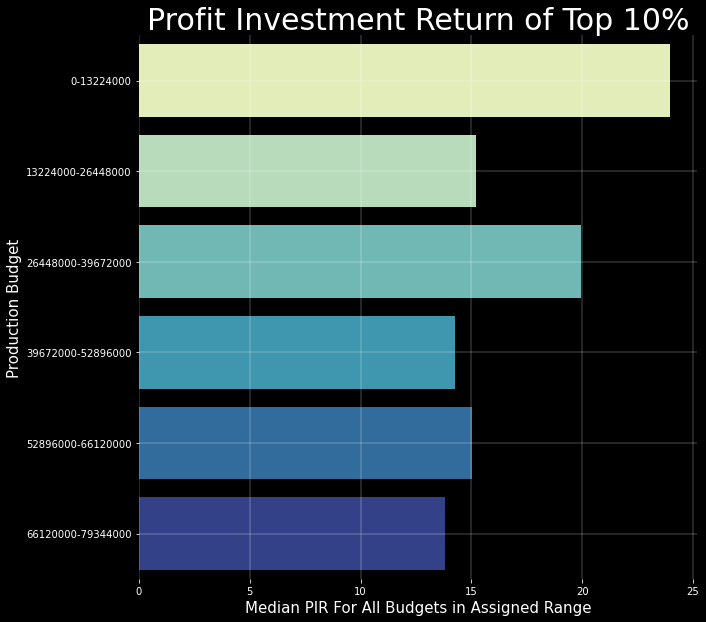

In [25]:
f, ax = plt.subplots(figsize=(10, 10), facecolor='black')

y = final_tbudgets['budgetbin']
x = final_tbudgets['worldwide_pir']
b = sns.barplot(x=x, y=y, palette='YlGnBu')


b.set_xlabel('Median PIR For All Budgets in Assigned Range', fontsize=15, color='white')
b.set_ylabel('Production Budget', fontsize=15, color ='white')
b.set_title('Profit Investment Return of Top 10%', fontsize=30, color='white')
plt.tick_params(axis='both', which='major', labelsize=10, color='white')

ax.grid(b=True, which='both', color='white', linewidth=0.3)
ax.tick_params(colors='white')
ax.set_facecolor('black')
sns.despine(left=True, bottom=True)

## Finding Recommended Release Month

I am determining which month to release a movie in by comparing top 10% to the overall table. I will look for an over-representation in the top 10%.

### Top 10% Release Month

In [26]:
top_movies = pd.read_sql('''
    SELECT movie, worldwide_pir, release_date 
    FROM basics
    WHERE release_date >= 2011
    AND domestic_gross > 0
    AND domestic_pir > 1
    ORDER BY worldwide_pir DESC
    LIMIT 74
    ;''', conn)

In [27]:
#sort by release month
top_movies['release_date'] = pd.to_datetime(top_movies['release_date'])
top_movies['release_month'] = top_movies['release_date'].dt.month
top_movies['release_month'].value_counts().sort_index()

1      8
2      5
3      5
4      5
5      4
6      6
7     12
8      5
9      5
10     9
11     7
12     3
Name: release_month, dtype: int64

### All Release Month

In [28]:
all_movies = pd.read_sql('''
    SELECT movie, worldwide_pir, release_date 
    FROM basics
    WHERE release_date >= 2011
    AND domestic_gross > 0
    AND domestic_pir > 1
    ORDER BY worldwide_pir DESC
    ;''', conn)

In [29]:
#sort by release month
all_movies['release_date'] = pd.to_datetime(all_movies['release_date'])
all_movies['release_month'] = all_movies['release_date'].dt.month
all_movies['release_month'].head()

0    7
1    1
2    4
3    4
4    1
Name: release_month, dtype: int64

### Comparison of Release Months

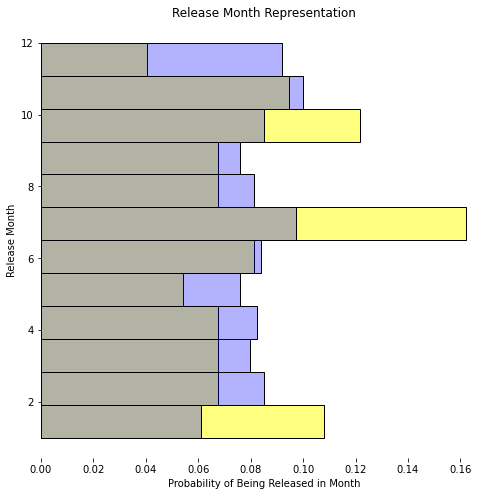

In [30]:
f, ax = plt.subplots(figsize=(8, 8))

m1 = top_movies['release_month']
m2 = all_movies['release_month']
x2 = sns.histplot(y=m1, color='yellow', stat='probability', alpha=0.5,
            bins=12)
y2 = sns.histplot(y=m2, color='blue', stat='probability', alpha=0.3,
            bins=12)

ax.set(xlabel='Probability of Being Released in Month')
ax.set(ylabel='Release Month')
ax.set(title='Release Month Representation')
sns.despine(left=True, bottom=True)

In [60]:
top_10 = top_movies['release_month'].value_counts().sort_index()
top_10.index = np.arange(0, len(top_10))

pop = all_movies['release_month'].value_counts().sort_index()
pop.index = np.arange(0, len(pop))

In [63]:
month_prob = pd.DataFrame(columns=['months', 'top_10', 'pop'])
months = 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
month_prob['months'] = months
month_prob['top_10'] = top_10/len(top_movies)*100
month_prob['pop'] = pop/len(all_movies)*100
month_prob['performance'] = month_prob['top_10'] - month_prob['pop']
month_prob

,months,top_10,pop,performance
0,January,10.810811,6.089310,4.721501
1,February,6.756757,8.525034,-1.768277
2,March,6.756757,7.983762,-1.227005
3,April,6.756757,8.254398,-1.497641
4,May,5.405405,7.577808,-2.172402
5,June,8.108108,8.389716,-0.281608
6,July,16.216216,9.742896,6.473320
7,August,6.756757,8.119080,-1.362323
8,September,6.756757,7.577808,-0.821051
9,October,12.162162,8.525034,3.637128


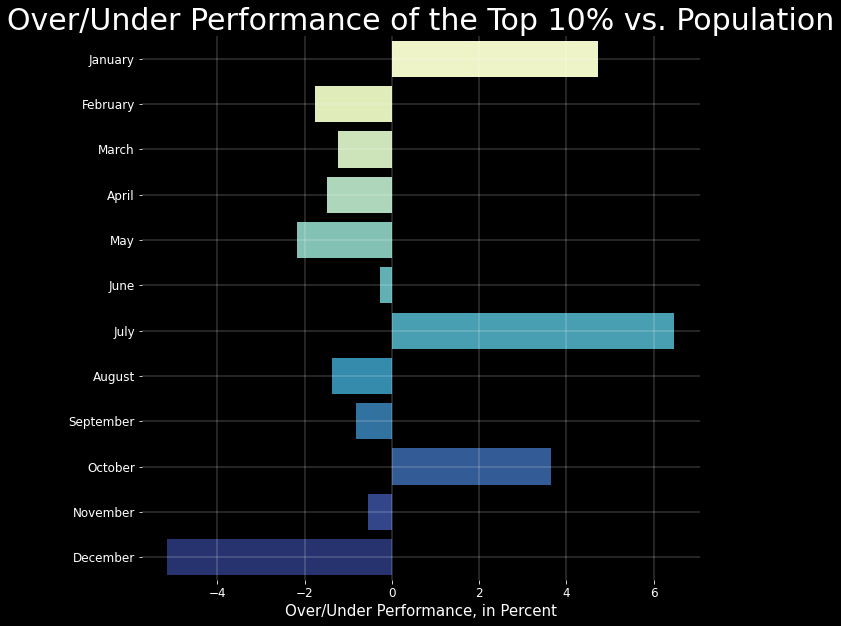

In [66]:
f, ax = plt.subplots(figsize=(10, 10), facecolor='black')

y = month_prob['months']
x = month_prob['performance']
m = sns.barplot(x=x, y=y, palette=sns.color_palette('YlGnBu', 12))

m.set_xlabel('Over/Under Performance, in Percent', fontsize=15, color='white')
m.set_title('Over/Under Performance of the Top 10% vs. Population',fontsize=30, color='white')
plt.tick_params(axis='both', which='major', labelsize=12, color='white')

ax.grid(b=True, which='both', color='white', linewidth=0.3)
ax.tick_params(colors='white')
ax.set_facecolor('black')
sns.despine(left=True, bottom=True)

## Finding Recommended Genre

I am pulling out the top genres to see if there is a clear genre that is over represented in the top 10%. I will only compare the movies that have at least 1 genre listed. The total is 1956, so this makes the top 10% the top 196. To make each movie have equal weight, if only 1 genre is listed then it will be copied over to genre_2 and genre_3. If there are 2 genres, then genre 1 will be copied to genre 3.

### Top 10% Genre Rep

In [34]:
# Can't clean completely, am not including ones
# where there is no genre listed
top_genre = pd.read_sql('''SELECT movie, genre_1, genre_2, genre_3
    FROM basics
    LEFT JOIN genres
        ON genres.primary_title = basics.movie
    WHERE release_date >= 2011
    AND domestic_gross > 0
    AND genre_1 IS NOT NULL
    ORDER BY worldwide_pir DESC
    LIMIT 196
    ;''', conn)
top_genre.head()

,movie,genre_1,genre_2,genre_3
0,the gallows,Horror,Mystery,Thriller
1,the devil inside,Horror,None,None
2,insidious,Horror,Mystery,Thriller
3,unfriended,Horror,Mystery,Thriller
4,split,Action,Drama,Sport


In [35]:
top_genre['genre_2'].fillna(top_genre['genre_1'], inplace=True)
top_genre['genre_3'].fillna(top_genre['genre_1'], inplace=True)
top_genre.head()

,movie,genre_1,genre_2,genre_3
0,the gallows,Horror,Mystery,Thriller
1,the devil inside,Horror,Horror,Horror
2,insidious,Horror,Mystery,Thriller
3,unfriended,Horror,Mystery,Thriller
4,split,Action,Drama,Sport


In [36]:
all_top_genres = top_genre['genre_1'].tolist()
all_top_genres_2 = top_genre['genre_2'].tolist()
all_top_genres.extend(all_top_genres_2)
all_top_genres_3 = top_genre['genre_3'].tolist()
all_top_genres.extend(all_top_genres_3)
len(all_top_genres)

588

In [37]:
top_10_genres = list(pd.unique(all_top_genres))
genre_count = dict.fromkeys(top_10_genres, 0)
for i in all_top_genres:
    genre_count[i] += 1

In [38]:
# find probability of each genre represented in top 10%
for genre in genre_count:
    genre_count[genre] = genre_count[genre]/588

In [39]:
# Zero count genres were added after the complete list was compliled.
# This was done to have matching dictionaries to add them into the same df
genre_count['War'] = 0
genre_count['News'] = 0
genre_count['Western'] = 0
genre_count = dict(sorted(genre_count.items()))

### All Genre Rep

In [40]:
# Can't clean completely, am not including ones
# where there is no genre listed
all_genre = pd.read_sql('''SELECT movie, genre_1, genre_2, genre_3
    FROM basics
    LEFT JOIN genres
        ON genres.primary_title = basics.movie
    WHERE release_date >= 2011
    AND domestic_gross > 0
    AND genre_1 IS NOT NULL
    ORDER BY worldwide_pir DESC
    ;''', conn)
all_genre.head()

,movie,genre_1,genre_2,genre_3
0,the gallows,Horror,Mystery,Thriller
1,the devil inside,Horror,None,None
2,insidious,Horror,Mystery,Thriller
3,unfriended,Horror,Mystery,Thriller
4,split,Action,Drama,Sport


In [41]:
all_genre['genre_2'].fillna(all_genre['genre_1'], inplace=True)
all_genre['genre_3'].fillna(all_genre['genre_1'], inplace=True)
all_genre.head()

,movie,genre_1,genre_2,genre_3
0,the gallows,Horror,Mystery,Thriller
1,the devil inside,Horror,Horror,Horror
2,insidious,Horror,Mystery,Thriller
3,unfriended,Horror,Mystery,Thriller
4,split,Action,Drama,Sport


In [42]:
list_all_genre = all_genre['genre_1'].tolist()
list_all_genre_2 = all_genre['genre_2'].tolist()
list_all_genre.extend(list_all_genre_2)
list_all_genre_3 = all_genre['genre_3'].tolist()
list_all_genre.extend(list_all_genre_3)
len(list_all_genre)

5868

In [43]:
all_uni_genres = list(pd.unique(list_all_genre))
genre_count_all = dict.fromkeys(all_uni_genres, 0)
for i in list_all_genre:
    genre_count_all[i] += 1

In [44]:
# find probability of each genre represented
for genre in genre_count_all:
    genre_count_all[genre] = genre_count_all[genre]/5868

In [45]:
genre_count_all['Music'] = 0.010736196319018405 + 0.0028970688479890935
genre_count_all = dict(sorted(genre_count_all.items()))
genre_count_all.pop('Musical')

0.0028970688479890935

### Comparison of all genres

In [46]:
genre_df = pd.DataFrame(list(genre_count_all.items()))

In [47]:
genre_df[2] = genre_df[0].map(genre_count)
genre_df.columns = ['Genre', 'Count_All', 'Top_10p']
genre_df.head()

,Genre,Count_All,Top_10p
0,Action,0.088105,0.047619
1,Adventure,0.062202,0.028912
2,Animation,0.020279,0.020408
3,Biography,0.034083,0.028912
4,Comedy,0.137866,0.125850


In [48]:
genre_df['Over_Performance'] = (genre_df['Top_10p'] - genre_df['Count_All'])*100
genre_df = genre_df.sort_values('Over_Performance', ascending=True)
genre_df

,Genre,Count_All,Top_10p,Over_Performance
0,Action,0.088105,0.047619,-4.048593
1,Adventure,0.062202,0.028912,-3.329021
5,Crime,0.046864,0.017007,-2.985755
4,Comedy,0.137866,0.125850,-1.201605
8,Family,0.017894,0.008503,-0.939026
9,Fantasy,0.025392,0.017007,-0.838515
10,History,0.010736,0.003401,-0.733484
6,Documentary,0.071915,0.066327,-0.558894
3,Biography,0.034083,0.028912,-0.517160
19,War,0.004431,0.000000,-0.443081


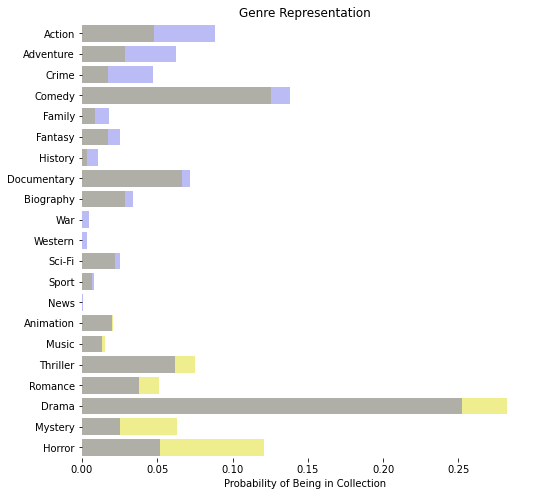

In [49]:
# plot that compares both percentages
f, ax = plt.subplots(figsize=(8, 8))

g1 = genre_df['Top_10p']
g2 = genre_df['Count_All']
sns.barplot(x=g1, y='Genre', data=genre_df, color='yellow', alpha=0.5)
sns.barplot(x=g2, y='Genre', data=genre_df, color='blue', alpha=0.3)

ax.set(xlabel='Probability of Being in Collection')
ax.set(ylabel='')
ax.set(title='Genre Representation')
sns.despine(left=True, bottom=True)

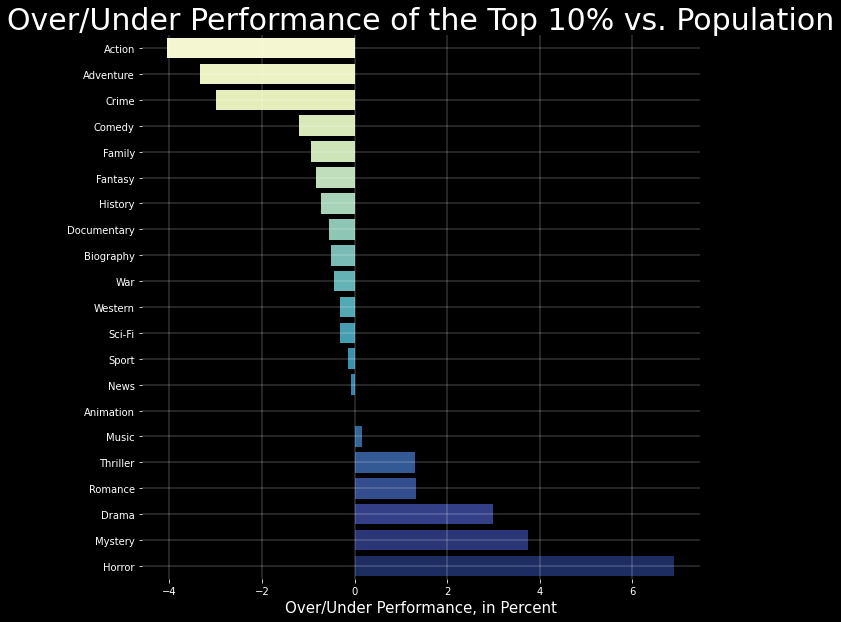

In [50]:
f, ax = plt.subplots(figsize=(10, 10), facecolor='black')

y = genre_df['Genre']
x = genre_df['Over_Performance']
g = sns.barplot(x=x, y=y, palette=sns.color_palette('YlGnBu', 21))

g.set_xlabel('Over/Under Performance, in Percent', fontsize=15, color='white')
g.set_title('Over/Under Performance of the Top 10% vs. Population', fontsize=30, color='white')
plt.tick_params(axis='both', which='major', labelsize=10, color='white')

ax.grid(b=True, which='both', color='white', linewidth=0.3)
ax.tick_params(colors='white')
ax.set_facecolor('black')
sns.despine(left=True, bottom=True)

## Final Conclusions

I would recommend:
* Setting a maximum budget of $13.2 million
* Releasing in either January, July, or November
* Doing a genre that falls in any of the following genres:
    * Horror
    * Mystery
    * Drama
    * Romance
    * Thriller
    
These categories are all over-represented in the top 10% population of the data indicating that they have a higher probability of turining a larger rate of return.

In [51]:
#Close connection to SQLite3 database
conn.close()